# <center> Mall Customer Segmentation by K-Means Clustering <center>

# 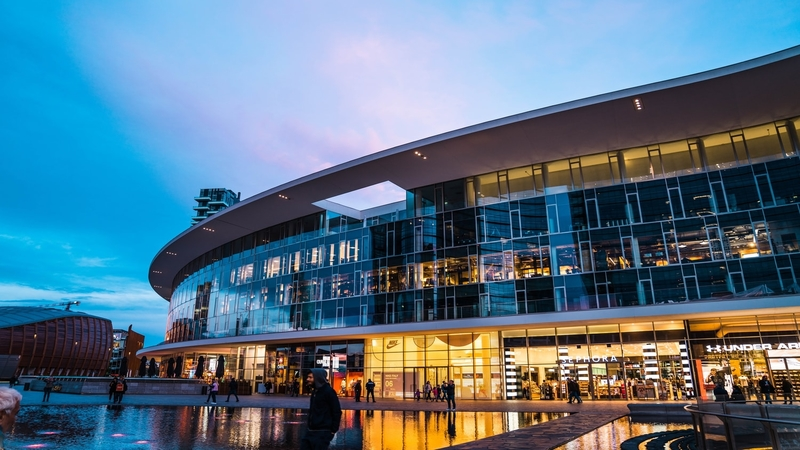

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#KMeans-Clustering" data-toc-modified-id="KMeans-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>KMeans Clustering</a></span><ul class="toc-item"><li><span><a href="#Segmentation-Based-on-Age-and-Spending-Score" data-toc-modified-id="Segmentation-Based-on-Age-and-Spending-Score-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Segmentation Based on Age and Spending Score</a></span><ul class="toc-item"><li><span><a href="#Finding-the-Optimal-Number-of-Clusters" data-toc-modified-id="Finding-the-Optimal-Number-of-Clusters-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Finding the Optimal Number of Clusters</a></span></li><li><span><a href="#Performing-Clustering-with-the-Optimal-Number-of-Clusters" data-toc-modified-id="Performing-Clustering-with-the-Optimal-Number-of-Clusters-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Performing Clustering with the Optimal Number of Clusters</a></span></li><li><span><a href="#Visualizing-the-Clusters" data-toc-modified-id="Visualizing-the-Clusters-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Visualizing the Clusters</a></span></li></ul></li><li><span><a href="#Segmentation-Based-on-Annual-Income-and-Spending-Score" data-toc-modified-id="Segmentation-Based-on-Annual-Income-and-Spending-Score-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Segmentation Based on Annual Income and Spending Score</a></span><ul class="toc-item"><li><span><a href="#Finding-the-Optimal-Number-of-Clusters" data-toc-modified-id="Finding-the-Optimal-Number-of-Clusters-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Finding the Optimal Number of Clusters</a></span></li><li><span><a href="#Performing-Clustering-with-the-Optimal-Number-of-Clusters" data-toc-modified-id="Performing-Clustering-with-the-Optimal-Number-of-Clusters-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Performing Clustering with the Optimal Number of Clusters</a></span></li><li><span><a href="#Visualizing-the-Clusters" data-toc-modified-id="Visualizing-the-Clusters-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Visualizing the Clusters</a></span></li></ul></li><li><span><a href="#Segmentation-Based-on-Age,-Annual-Income-and-Spending-Score" data-toc-modified-id="Segmentation-Based-on-Age,-Annual-Income-and-Spending-Score-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Segmentation Based on Age, Annual Income and Spending Score</a></span><ul class="toc-item"><li><span><a href="#Finding-the-Optimal-Number-of-Clusters" data-toc-modified-id="Finding-the-Optimal-Number-of-Clusters-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Finding the Optimal Number of Clusters</a></span></li><li><span><a href="#Performing-Clustering-with-the-Optimal-Number-of-Clusters" data-toc-modified-id="Performing-Clustering-with-the-Optimal-Number-of-Clusters-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Performing Clustering with the Optimal Number of Clusters</a></span></li><li><span><a href="#Visualizing-the-Clusters" data-toc-modified-id="Visualizing-the-Clusters-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Visualizing the Clusters</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Segmentation is the practice of dividing a database into groups of observations that are similar in specific ways relevant to marketing. Each groups contain individuals that are similar in-between themselves, and different from individuals from the other groups. Segmentation is widely used as a marketing tool to create clusters of clients and adapt a relevant strategy for each of them.

In this notebook, we will be illustrating how to apply K Means algorithm to a dataset. Here we have a dataset of customers who purchase stuff in a mall. This dataset contains information such as Gender, Age,	Annual Income, Spending Score. 

First, we will perform exploratory data analysis and then work on customer segmentation by implementing K-Means Clustering based on the characteristics of customers. In this way, we can find the main clusters which are the most representative types of customers.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.info()

The dataset is clean and does not need Data Cleaning.

We rename the columns.

In [ ]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']

## Exploratory Data Analysis

We visualize the distribution of Age, Annual Income and Spending Score values.

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(df['Age'], color='royalblue')
plt.title('Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.distplot(df['Annual Income'], color='deeppink')
plt.title('Income', fontsize=16)
plt.xlabel('Income', fontsize=14)

plt.subplot(1,3,3)
sns.distplot(df['Spending Score'], color='forestgreen')
plt.title('Spending Score', fontsize=16)
plt.xlabel('Spending Score', fontsize=14)

plt.show()

We analyze the distribution of Age, Annual Income and Spending Score values based on Gender.

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.violinplot(x='Age', y='Gender', data=df, color='y')
sns.swarmplot(x='Age', y='Gender', data=df, palette='plasma')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.yticks([0,1],['Male','Female'],fontsize=12 )

plt.subplot(1,3,2)
sns.violinplot(x='Annual Income', y='Gender', data=df,color='g')
sns.swarmplot(x='Annual Income', y='Gender', data=df,palette='plasma')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel(' ')
plt.yticks([])
plt.title('Violinplots and Swarmplots',fontsize=25)

plt.subplot(1,3,3)
sns.violinplot(x='Spending Score', y='Gender', data=df, color='c')
sns.swarmplot(x='Spending Score', y='Gender', data=df,palette='plasma')
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel(' ')
plt.yticks([])

plt.show()

We count the number of male and female customers.

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df, palette='winter')
plt.title('Count Plot of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1],['Male','Female'],fontsize=12 )
plt.show()

In the following figures, we visualize the relationship between Age, Annual Income, Spending Score and Gender.

In [ ]:
sns.set_style('white')
new=sns.PairGrid(df.drop(['CustomerID', 'Gender'],axis=1))
new.map(sns.regplot, color='teal')
plt.suptitle('Relationship between Age, Annual Income and Spending Score',y=1.05,fontsize=14)
plt.show()

In [ ]:
sns.lmplot(x='Age', y='Annual Income', data=df,fit_reg=False, hue='Gender', height=6, palette='plasma')
plt.title('Relationship between Age, Annual Income and Gender', fontsize=14)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Annual Income', fontsize=13)
plt.show()

In [ ]:
sns.lmplot(x='Annual Income', y='Spending Score', data=df,fit_reg=False, hue='Gender', height=6, palette='Dark2')
plt.title('Annual Income vs Spending Score vs Gender', fontsize=14)
plt.xlabel('Annual Income', fontsize=13)
plt.ylabel('Spending Score', fontsize=13)
plt.show()

## KMeans Clustering

### Segmentation Based on Age and Spending Score

#### Finding the Optimal Number of Clusters 

First, we find the optimal number of clusters by elbow method.

In [ ]:
X1=df[['Age','Spending Score']]
inertia1=[]
for n in range(1 , 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model1.fit(X1)
    inertia1.append(model1.inertia_)
print(inertia1)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1 , 11)), inertia1, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

We can see that if the number of clusters is smaller than 4, the inertia has a high value but if the number of clusters is larger than 4, the inertia is relatively constant. So we choose 4 as the optimal number of clusters.

#### Performing Clustering with the Optimal Number of Clusters 

In [ ]:
model1=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

#### Visualizing the Clusters 

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Age'], y=df['Spending Score'],c=labels1,cmap='winter')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1], s = 300 , c = 'red')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Age and Spending Score',fontsize=18)
plt.show()

### Segmentation Based on Annual Income and Spending Score

#### Finding the Optimal Number of Clusters 

In [ ]:
X2=df[['Annual Income','Spending Score']]
inertia2=[]
for n in range(1,11):
    model2=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    model2.fit(X2)
    inertia2.append(model2.inertia_)  
print(inertia2)

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('white')
plt.plot(list(range(1,11)),inertia2,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='c', markeredgecolor='c')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 5, the inertia has a high value but if the number of clusters is larger than 5, the inertia is relatively constant. So we choose 5 as the optimal number of clusters.

#### Performing Clustering with the Optimal Number of Clusters 

In [ ]:
model2=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
model2.fit(X2)
centroids2=model2.cluster_centers_
labels2=model2.labels_

#### Visualizing the Clusters 

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Annual Income'], y=df['Spending Score'],c=labels2,cmap='winter')
plt.scatter(centroids2[:,0], centroids2[:,1],c='red',s=200)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Annual Income and Spending Score',fontsize=18)
plt.show()

### Segmentation Based on Age, Annual Income and Spending Score

#### Finding the Optimal Number of Clusters 

In [ ]:
X3=df[['Age', 'Annual Income', 'Spending Score']]
inertia3=[]
for n in range (1,10):
    model3=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model3.fit(X3)
    inertia3.append(model3.inertia_)
print(inertia3)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia3, color='indigo',marker='o', linewidth=2, markersize=12, markerfacecolor='violet', markeredgecolor='violet')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 6, the inertia has a high value but if the number of clusters is larger than 6, the inertia is relatively constant. So we choose 6 as the optimal number of clusters.

#### Performing Clustering with the Optimal Number of Clusters 

In [ ]:
model3=KMeans(n_clusters=6,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model3.fit(X3)
centroids3=model3.cluster_centers_
labels3=model3.labels_

#### Visualizing the Clusters 

In [ ]:
fig=px.scatter_3d(data_frame=df,x='Age',y='Annual Income',z='Spending Score',color=labels3, color_continuous_scale='bluered')
fig.update_layout(
    title={
        'text': 'Customer Segmentation Based on Age, Annual Income and Spending Score',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## Conclusion

- In this notebook, we used a dataset of mall customers and performed exploratory data analysis to visualize the relationship between columns.

- We implemented three different segmentation strategies by K-Means Clustering based on:
    - Age and Spending Score
    - Annual Income and Spending Score
    - Age, Annual Income and Spending Score

- The number of clusters were different in different strategies, varying between 4 and 6 groups of customers.